<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/23_FED_Banco_Central_Americano_Dados_Economicos_dos_Estados_Unidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Python para Investimentos - FED Banco Central Americano - Dados Economicos dos Estados Unidos

**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

**Canal no Youtube:** https://www.youtube.com/ricospeloacaso?sub_confirmation=1

Link para o Vídeo: https://youtu.be/Cvr9mSwkcAE

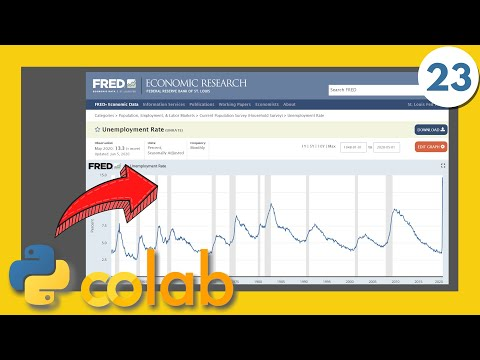

In [ ]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('Cvr9mSwkcAE', width=854, height=480)

###Bibliotecas

In [ ]:
!pip install pandas_datareader

In [ ]:
import pandas_datareader.data as web

from scipy.stats import zscore
import plotly.express as px
import datetime

In [ ]:
start = datetime.datetime(2000, 1, 1)
#end = datetime.datetime(2013, 1, 27)

###PIB

In [ ]:
gdp = web.DataReader('GDP', 'fred', start )

In [ ]:
gdp

,GDP
DATE,
2000-01-01,10002.857
2000-04-01,10247.679
2000-07-01,10319.825
2000-10-01,10439.025
2001-01-01,10472.879
...,...
2019-01-01,21098.827
2019-04-01,21340.267
2019-07-01,21542.540


In [ ]:
px.line(gdp, x=gdp.index, y='GDP')

###Inflação

In [ ]:
# Multiple series:
cpi = web.DataReader('CPIAUCSL', 'fred', start)

In [ ]:
cpi

,CPIAUCSL
DATE,
2000-01-01,169.300
2000-02-01,170.000
2000-03-01,171.000
2000-04-01,170.900
2000-05-01,171.200
...,...
2019-12-01,258.444
2020-01-01,258.820
2020-02-01,259.050


In [ ]:
px.bar(data_frame=cpi.pct_change()*100, x=cpi.index, y='CPIAUCSL', labels={'CPIAUCSL':'Inflação (%)'})

###Treasury Bonds

####3 Meses

In [ ]:
t3mo = web.DataReader('DGS3MO', 'fred', start)

In [ ]:
t3mo

,DGS3MO
DATE,
2000-01-03,5.48
2000-01-04,5.43
2000-01-05,5.44
2000-01-06,5.41
2000-01-07,5.38
...,...
2020-05-29,0.14
2020-06-01,0.14
2020-06-02,0.15


In [ ]:
px.line(data_frame=t3mo, x=t3mo.index, y='DGS3MO')

####10 Anos

In [ ]:
t10 = web.DataReader('DGS10', 'fred', start)

In [ ]:
t10

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52
...,...
2020-05-29,0.65
2020-06-01,0.66
2020-06-02,0.68


In [ ]:
px.line(data_frame=t10, x=t10.index, y='DGS10')

###Emprego

####Taxa de Desemprego

In [ ]:
desemprego = web.DataReader('UNRATE', 'fred', start)

In [ ]:
desemprego

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2020-01-01,3.6
2020-02-01,3.5
2020-03-01,4.4


In [ ]:
px.line(data_frame=desemprego, x=desemprego.index, y='UNRATE')

In [ ]:
var_desemprego = desemprego.pct_change()[1:]

In [ ]:
px.bar(data_frame=var_desemprego, x=var_desemprego.index, y='UNRATE')

In [ ]:
px.bar(y=zscore(var_desemprego), x=var_desemprego.index, labels={'y':'desvios-padrão'})

####Pessoas Empregadas

In [ ]:
empregos = web.DataReader('PAYEMS', 'fred', start)

In [ ]:
empregos

,PAYEMS
DATE,
2000-01-01,131005
2000-02-01,131124
2000-03-01,131596
2000-04-01,131888
2000-05-01,132105
...,...
2020-01-01,152212
2020-02-01,152463
2020-03-01,151090


In [ ]:
px.line(data_frame=empregos, x=empregos.index, y='PAYEMS')

In [ ]:
px.bar(data_frame=empregos.pct_change(), x=empregos.index, y='PAYEMS')

###Impressora de Dólar - Agregado M2 (Papel moeda, depósitos à vista e à prazo)

In [ ]:
m2 = web.DataReader('M2', 'fred', start)

In [ ]:
m2

,M2
DATE,
2000-01-03,4653.1
2000-01-10,4657.6
2000-01-17,4659.8
2000-01-24,4667.0
2000-01-31,4667.7
...,...
2020-04-27,17566.6
2020-05-04,17765.3
2020-05-11,17990.4


In [ ]:
px.line(data_frame=m2, x=m2.index, y='M2')

###Ativos do FED

In [ ]:
ativos = web.DataReader('WALCL', 'fred', start)

In [ ]:
ativos

,WALCL
DATE,
2002-12-18,719542.0
2002-12-25,732059.0
2003-01-01,730994.0
2003-01-08,723762.0
2003-01-15,720074.0
...,...
2020-05-06,6721420.0
2020-05-13,6934227.0
2020-05-20,7037258.0


In [ ]:
px.line(data_frame=ativos, x=ativos.index, y='WALCL')